# $\textbf{Exploratory Data Analysis}$

## **Importing Relevant Libraries**

In [1]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 58 kB 6.4 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=99116aa1aafcb673d287213bdee4c0856016bf6f559b56106d091cf8cbe26a6c
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

pd.pandas.set_option('display.max_columns', None)
# pd.pandas.set_option('display.max_rows', None)

## **Downloading the dataset from Kaggle**

In [3]:
import os
os.environ['KAGGLE_USERNAME'] = "sushrutgaikwad"
os.environ['KAGGLE_KEY'] = "7d35f99822daf68b0a5cc2bc4756f94e"
! kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 27.4MB/s]


In [4]:
! unzip house-prices-advanced-regression-techniques.zip

Archive:  house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


## **Importing the data**

In [5]:
dataset = pd.read_csv('/content/train.csv')

print(f'Our data has {dataset.shape[0]} rows and {dataset.shape[1]} columns.')

Our data has 1460 rows and 81 columns.


Let's see the first few rows of our data to get an idea.

In [6]:
dataset.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

### **Observations:**
1. `Id` is unique for every house, hence we can drop it.
2. As there are $\approx80$ features, we may want to consider feature selection for a better model.
3. We have some temporal features like `YearBuilt`, `YearRemodAdd`, `GarageYrBlt`, and `YrSold`. We would have to engineer them appropriately.

## **Missing Values**

Let's see percentage of missing values in the features containing them.

In [7]:
features_with_NaN = [feature for feature in dataset.columns if dataset[feature].isnull().sum()>=1]
print(f'There are {len(features_with_NaN)} features containing missing values. They are:')
for feature in features_with_NaN:
  percent_nan = (dataset[feature].isnull().mean())*100
  print(f'{feature} has {np.round(percent_nan, decimals=4)} % NaN values.')

There are 19 features containing missing values. They are:
LotFrontage has 17.7397 % NaN values.
Alley has 93.7671 % NaN values.
MasVnrType has 0.5479 % NaN values.
MasVnrArea has 0.5479 % NaN values.
BsmtQual has 2.5342 % NaN values.
BsmtCond has 2.5342 % NaN values.
BsmtExposure has 2.6027 % NaN values.
BsmtFinType1 has 2.5342 % NaN values.
BsmtFinType2 has 2.6027 % NaN values.
Electrical has 0.0685 % NaN values.
FireplaceQu has 47.2603 % NaN values.
GarageType has 5.5479 % NaN values.
GarageYrBlt has 5.5479 % NaN values.
GarageFinish has 5.5479 % NaN values.
GarageQual has 5.5479 % NaN values.
GarageCond has 5.5479 % NaN values.
PoolQC has 99.5205 % NaN values.
Fence has 80.7534 % NaN values.
MiscFeature has 96.3014 % NaN values.


#### **Observations:**
1. Some features like `Alley`, `FireplaceQu`, `PoolQC`, `Fence`, `MiscFeature` have an overwhelmingly huge amount of missing values. It is tempting to drop these features, but we will look at the data description file to know more about them in the missing value imputation step.

Before we try to impute the missing values, or drop some of the features for having too many missing values, we would want to see their relationship with the dependent variable `SalePrice`. Let's do that now.

### **Relationship between missing values and the dependent variable `SalePrice`**

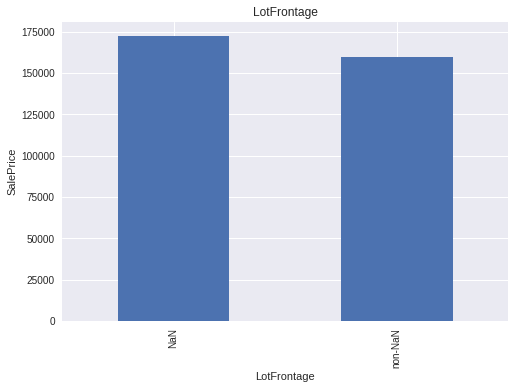

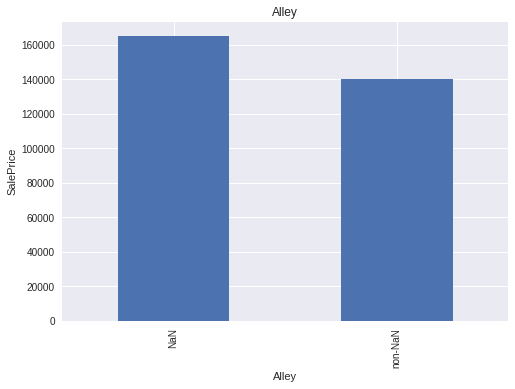

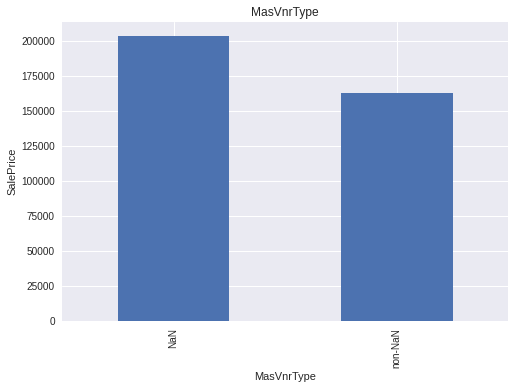

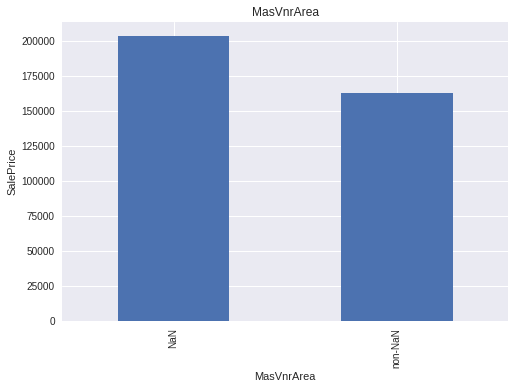

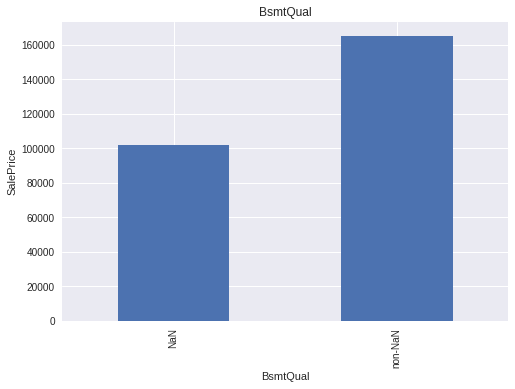

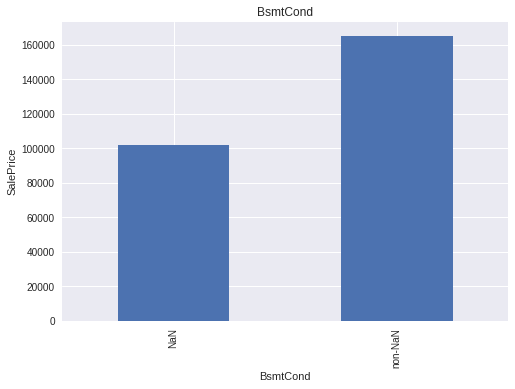

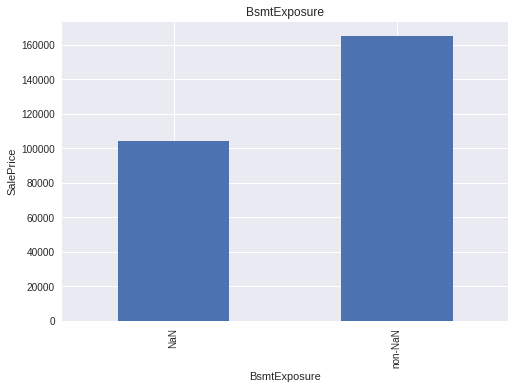

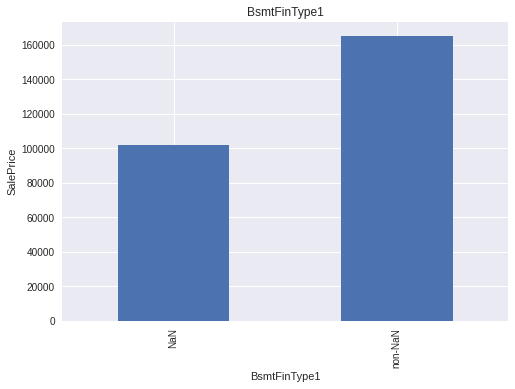

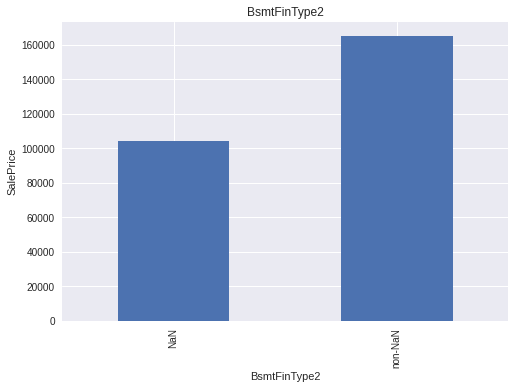

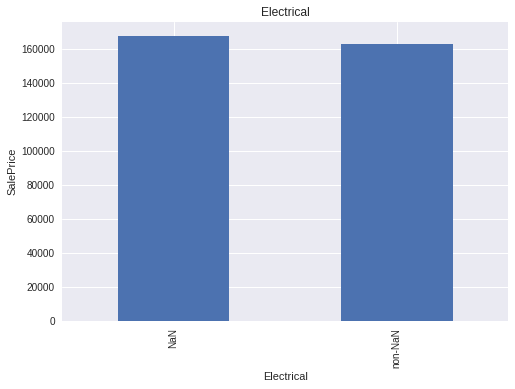

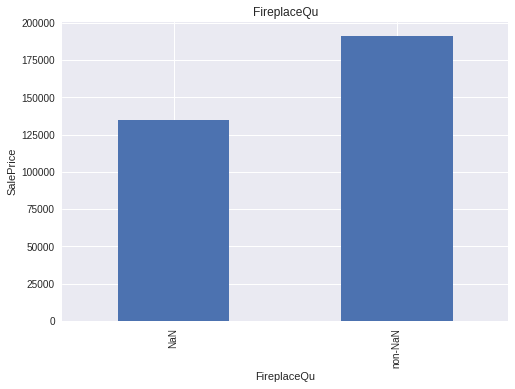

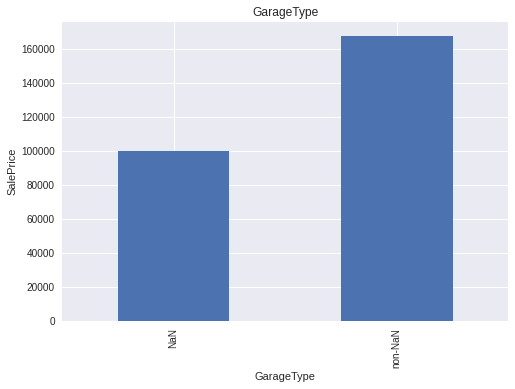

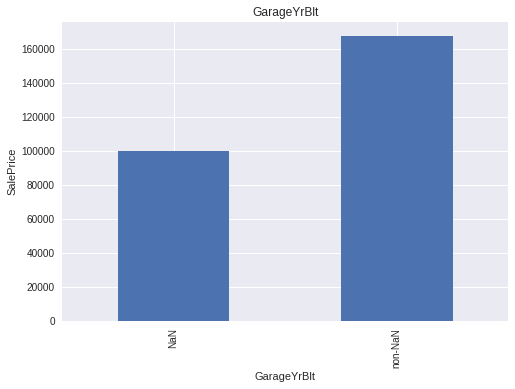

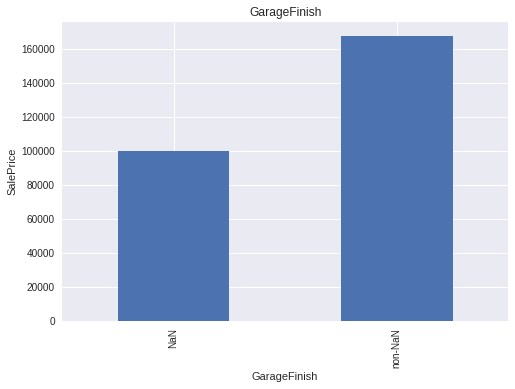

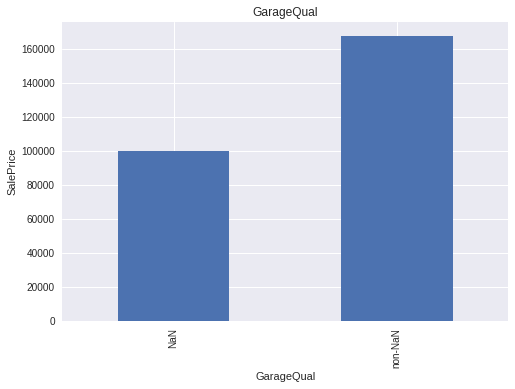

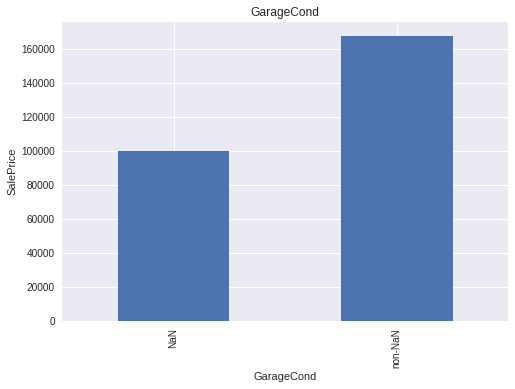

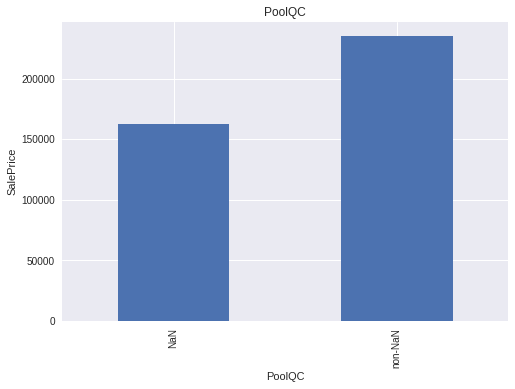

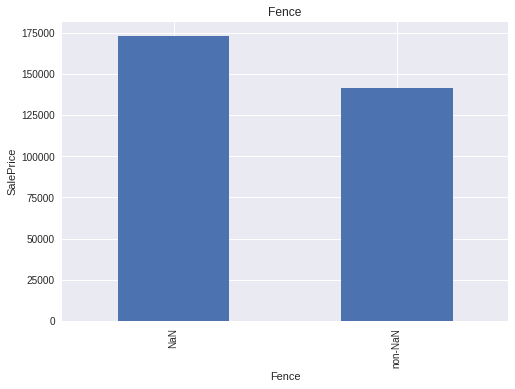

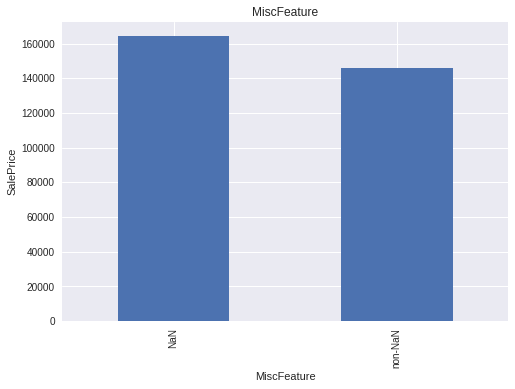

In [8]:
for feature in features_with_NaN:
  data = dataset.copy()

  # Here, we transform the feature such that it shows 'NaN' for the NaN observation
  # and 'non-NaN' for the non-NaN observation.
  data[feature] = np.where(data[feature].isnull(), 'NaN', 'non-NaN')

  # Now, we calculate the median SalePrice for NaN observations (i.e., 'NaN'), and
  # for the non-NaN observations (i.e., 'non-NaN')
  # This will help us see if there is any relation between the observation
  #being a NaN value and the dependent variable SalePrice.
  plt.style.use('seaborn')
  data.groupby(feature)['SalePrice'].median().plot.bar()
  plt.title(feature)
  plt.ylabel('SalePrice')
  plt.show()

#### **Observations:**
1. Clearly, missing values are playing a huge role in predicting `SalePrice`. So, we will have to handle them appropriately in the missing value imputation step.

## **Numerical Features**
Let's now have a look at the numerical features in our data.

In [9]:
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O' and feature not in ['Id']]

print(f'There are total {len(numerical_features)} numerical features in our data.')

There are total 37 numerical features in our data.


Let's see the first few rows of these numerical features to get a better idea.

In [10]:
dataset[numerical_features].head(10)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
5,50,85.0,14115,5,5,1993,1995,0.0,732,0,64,796,796,566,0,1362,1,0,1,1,1,1,5,0,1993.0,2,480,40,30,0,320,0,0,700,10,2009,143000
6,20,75.0,10084,8,5,2004,2005,186.0,1369,0,317,1686,1694,0,0,1694,1,0,2,0,3,1,7,1,2004.0,2,636,255,57,0,0,0,0,0,8,2007,307000
7,60,NaN,10382,7,6,1973,1973,240.0,859,32,216,1107,1107,983,0,2090,1,0,2,1,3,1,7,2,1973.0,2,484,235,204,228,0,0,0,350,11,2009,200000
8,50,51.0,6120,7,5,1931,1950,0.0,0,0,952,952,1022,752,0,1774,0,0,2,0,2,2,8,2,1931.0,2,468,90,0,205,0,0,0,0,4,2008,129900
9,190,50.0,7420,5,6,1939,1950,0.0,851,0,140,991,1077,0,0,1077,1,0,1,0,2,2,5,2,1939.0,1,205,0,4,0,0,0,0,0,1,2008,118000


### **Temporal Features**
Let's now see what we can do about the temporal features we mentioned earlier. Let's first capture them in a list.

In [11]:
temporal_features = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

temporal_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

Let's see their relationship with `SalePrice`.

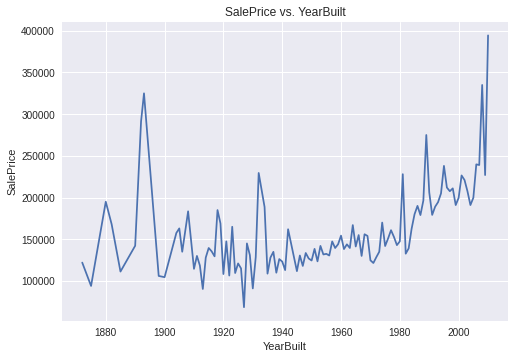

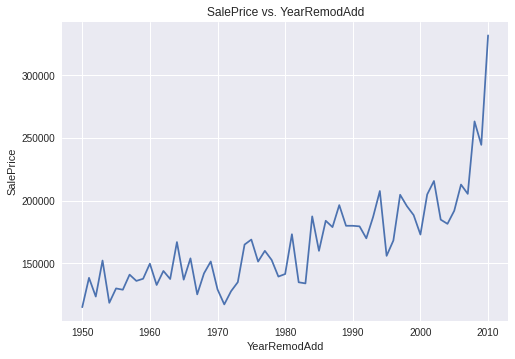

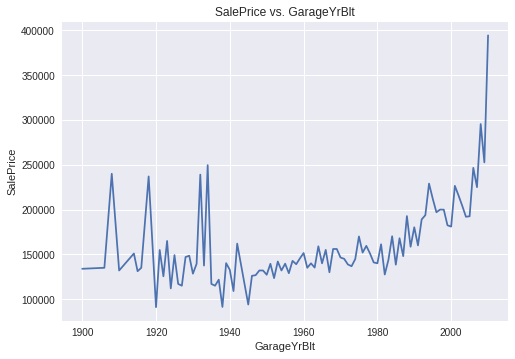

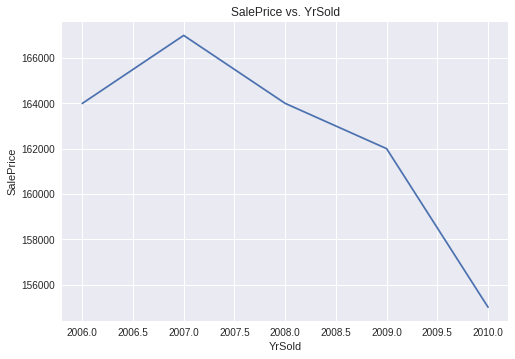

In [12]:
for feature in temporal_features:
    plt.style.use('seaborn')
    dataset.groupby(feature)['SalePrice'].median().plot()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(f'SalePrice vs. {feature}')
    plt.show()

#### **Observations:**
1. The first three plots make sense. `SalePrice` should increase for newly build houses, newly remodified houses, and newly build garages.
2. We can see some very old houses sold for a higher price in the first plot. This may indicate that old historical properties are sold for a higher price. Possibly they are auctioned and the highest bidder would obviously pay a very high price.
3. The last plot, `SalePrice` vs. `YrSold` doesn't seem to make sense. `SalePrice` should increase for more recently sold houses. Let's explore this more. We will modify these features to generate new features in the following way.

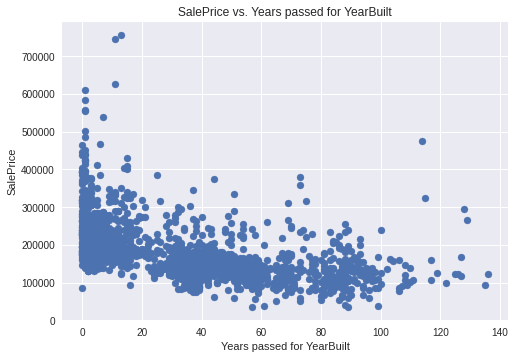

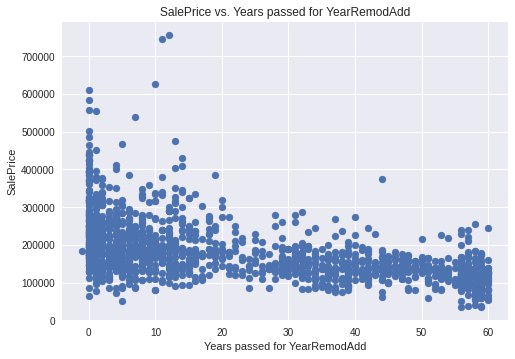

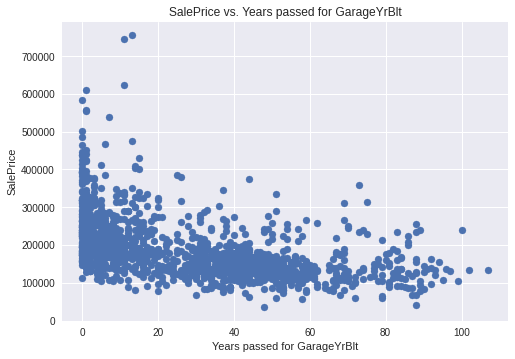

In [13]:
for feature in temporal_features:
  if feature != 'YrSold':
    data = dataset.copy()
    data[f'Years passed for {feature}'] = data['YrSold'] - data[feature]
    
    plt.style.use('seaborn')
    plt.scatter(data[f'Years passed for {feature}'], data['SalePrice'])
    plt.xlabel(f'Years passed for {feature}')
    plt.ylabel('SalePrice')
    plt.title(f'SalePrice vs. Years passed for {feature}')
    plt.show()

#### **Observations:**
1. Now we can see why in the last cell plots, `SalePrice` vs `YearSold` didn't seem to make sense. E.g., a house sold recently having a garage which was built a long time ago would have a lower `SalePrice` as compared to a house sold a few years back having a newer garage.
2. The same explanation works for house remodification.

Numerical features are of two types:
1. Discrete,
2. Continuous

Let's have a look at them now

### **Discrete Features**
Let's set the threshold of number of unique values for a numerical feature to be discrete as $20$.

In [14]:
discrete_features = [feature for feature in numerical_features if dataset[feature].nunique()<20 and feature not in temporal_features]

print(f'There are {len(discrete_features)} discrete features in our data, which are:')
discrete_features

There are 14 discrete features in our data, which are:


['MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'PoolArea',
 'MoSold']

In [15]:
dataset[discrete_features].head(10)

,MSSubClass,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold
0,60,7,5,1,0,2,1,3,1,8,0,2,0,2
1,20,6,8,0,1,2,0,3,1,6,1,2,0,5
2,60,7,5,1,0,2,1,3,1,6,1,2,0,9
3,70,7,5,1,0,1,0,3,1,7,1,3,0,2
4,60,8,5,1,0,2,1,4,1,9,1,3,0,12
5,50,5,5,1,0,1,1,1,1,5,0,2,0,10
6,20,8,5,1,0,2,0,3,1,7,1,2,0,8
7,60,7,6,1,0,2,1,3,1,7,2,2,0,11
8,50,7,5,0,0,2,0,2,2,8,2,2,0,4
9,190,5,6,1,0,1,0,2,2,5,2,1,0,1


#### **Relationship between discrete featues and the dependent variable `SalePrice`**

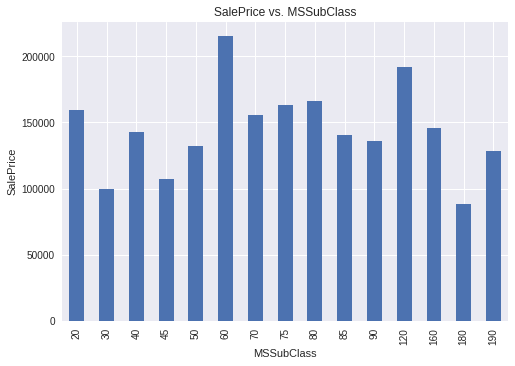

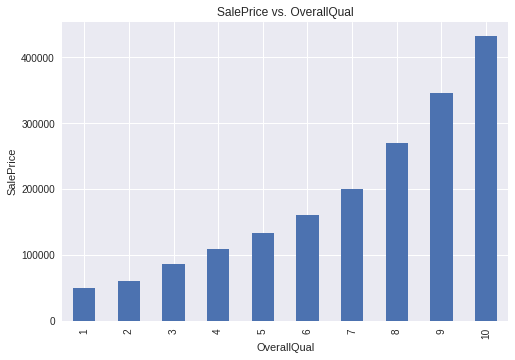

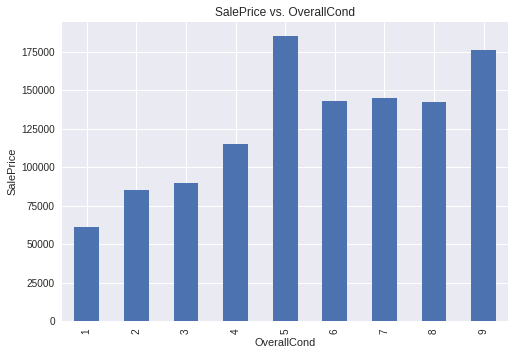

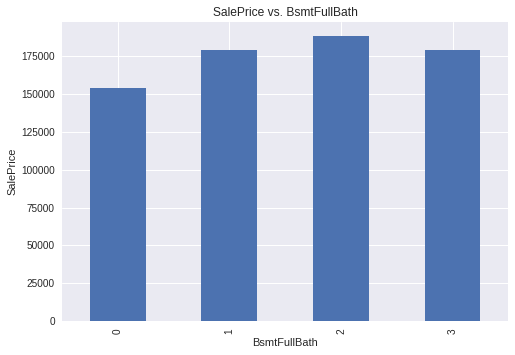

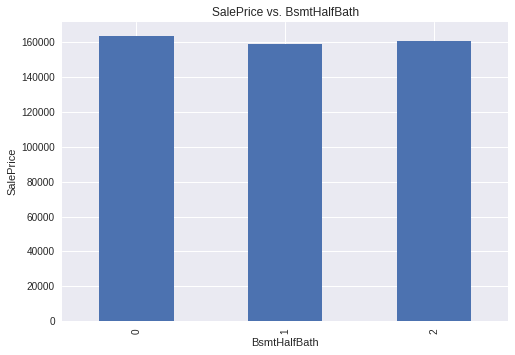

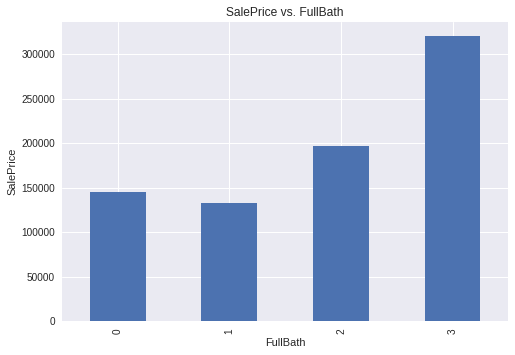

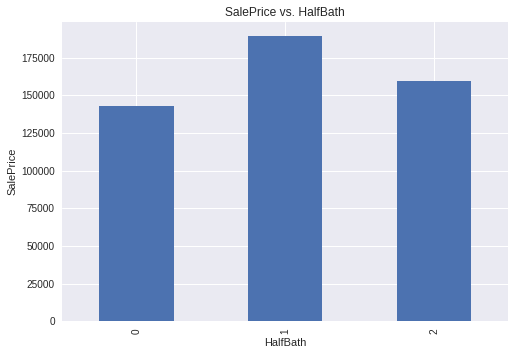

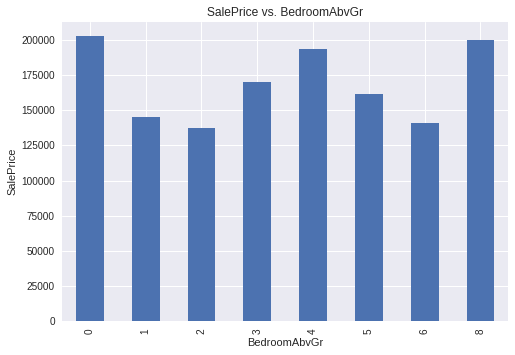

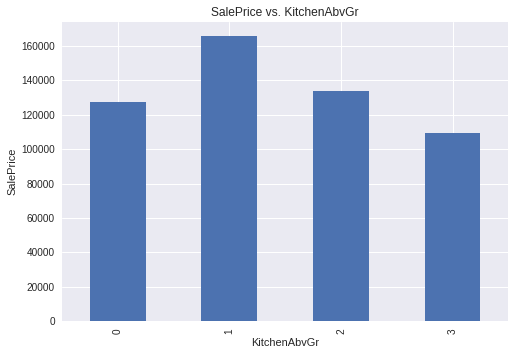

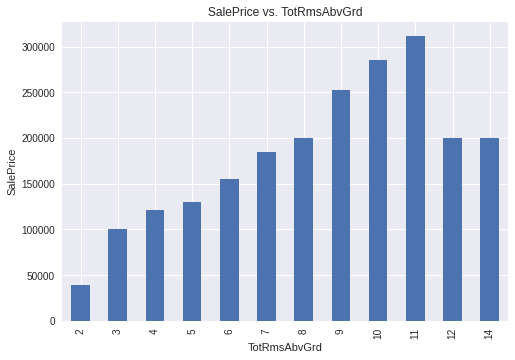

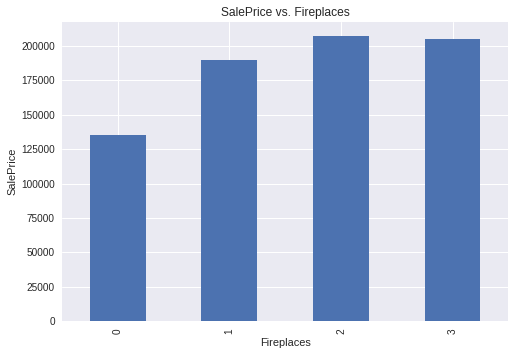

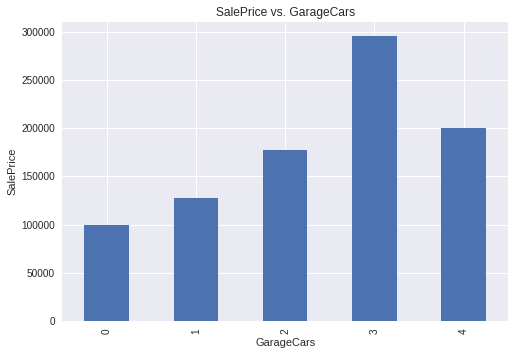

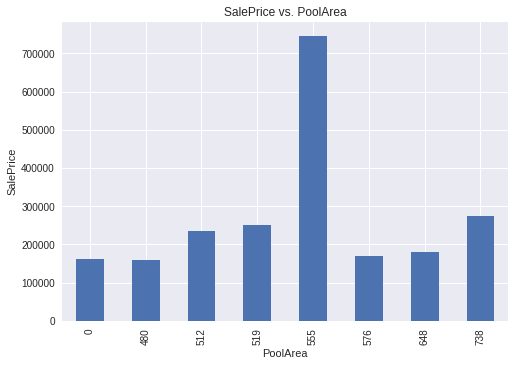

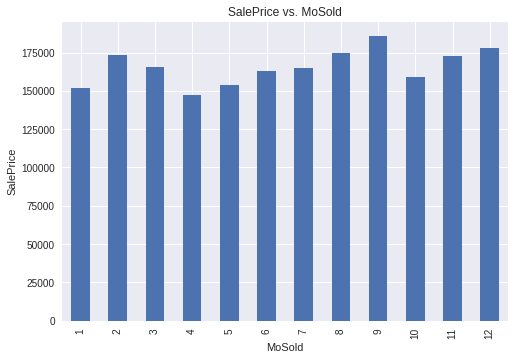

In [16]:
for feature in discrete_features:
  data = dataset.copy()
  plt.style.use('seaborn')
  data.groupby(feature)['SalePrice'].median().plot.bar()
  plt.xlabel(feature)
  plt.ylabel('SalePrice')
  plt.title(f'SalePrice vs. {feature}')
  plt.show()

##### **Observations:**
1. Some discrete features are made for having a monotonous relationship with `SalePrice`, like the overall quality and the overall condition. Whereas, some other features are not monotonous with `SalePrice`.
2. If we are using a model which assumes a monotonous relationship with the dependent variable, we will have to encode these features in such a way that we get a monotonous relationship with `SalePrice`.

### **Continuous Features:**

In [17]:
continuous_features = [feature for feature in numerical_features if feature not in discrete_features + temporal_features]

print(f'There are {len(continuous_features)} continuous features in our data, which are:')
continuous_features

There are 19 continuous features in our data, which are:


['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'SalePrice']

To understand continuous features better, we define a function `diagnostic_plots` which plots the histogram and the Q-Q plots for a given variable and a DataFrame.

In [18]:
def diagnostic_plots(df, variable):
  plt.figure(figsize=(15,6))
  plt.subplot(1,2,1)
  df[variable].hist(bins = 25)
  plt.title(f'Histogram of {variable}')
  plt.xlabel(variable)
  plt.ylabel('Count')

  plt.subplot(1,2,2)
  stats.probplot(df[variable], dist='norm', plot=plt)

  plt.show()

Let's see these plots for all the continuous features.

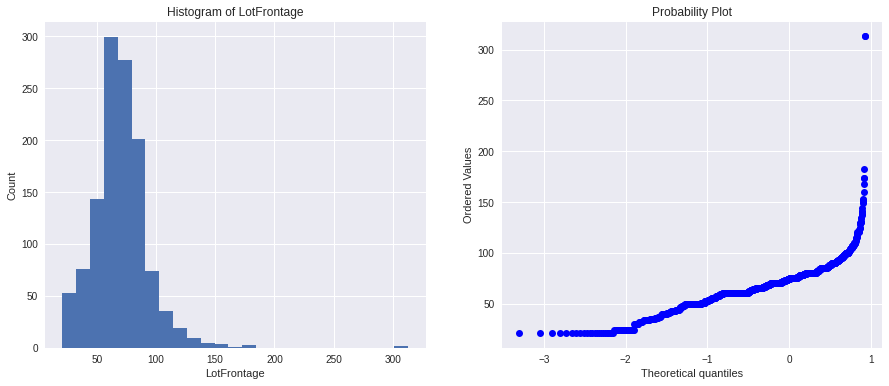

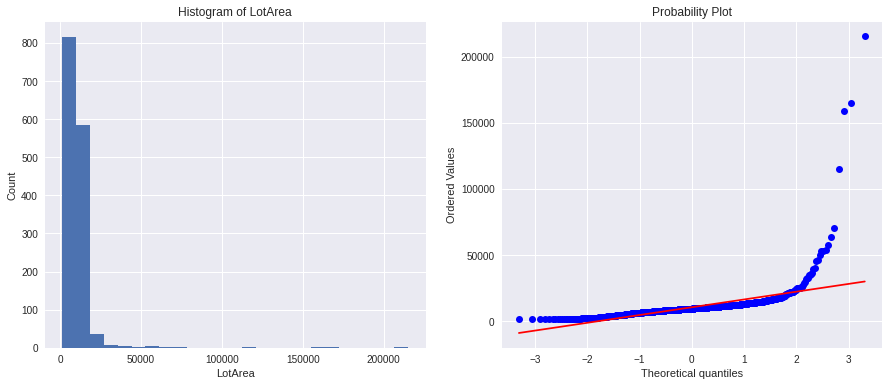

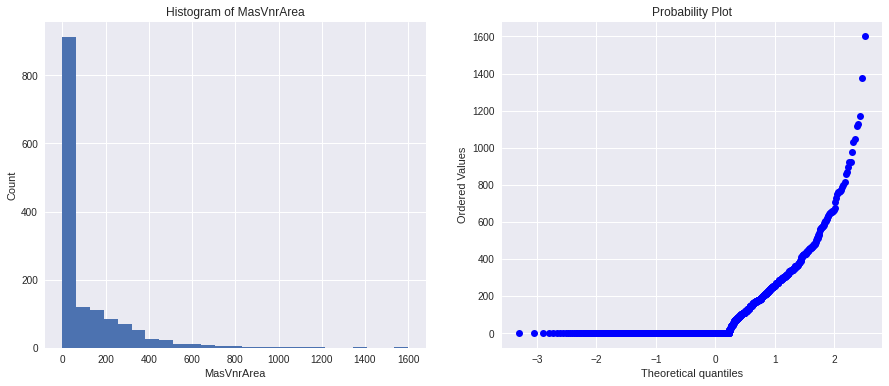

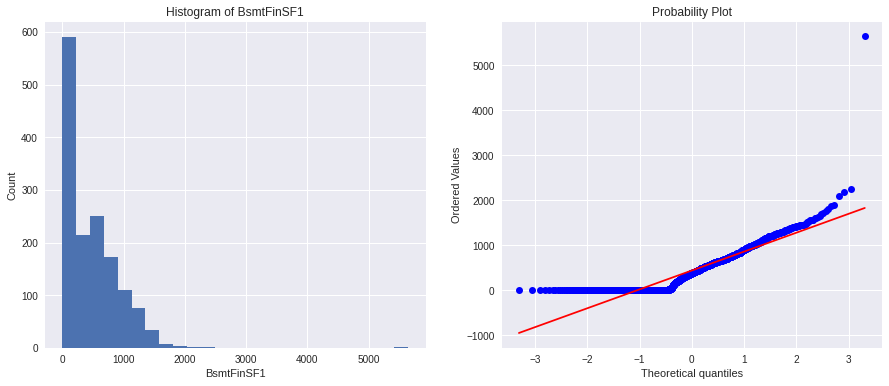

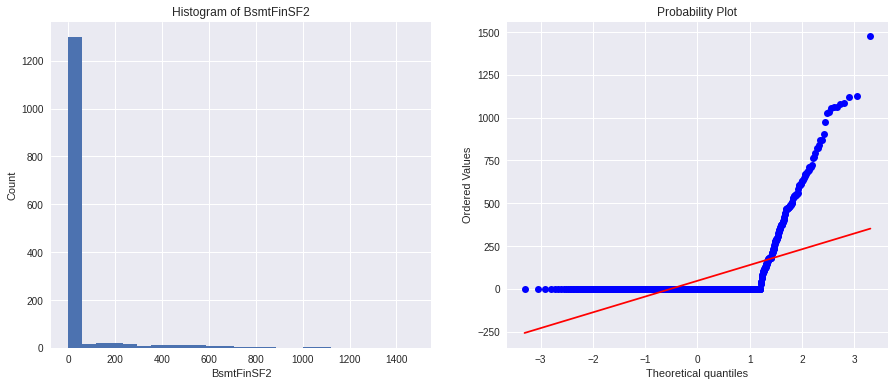

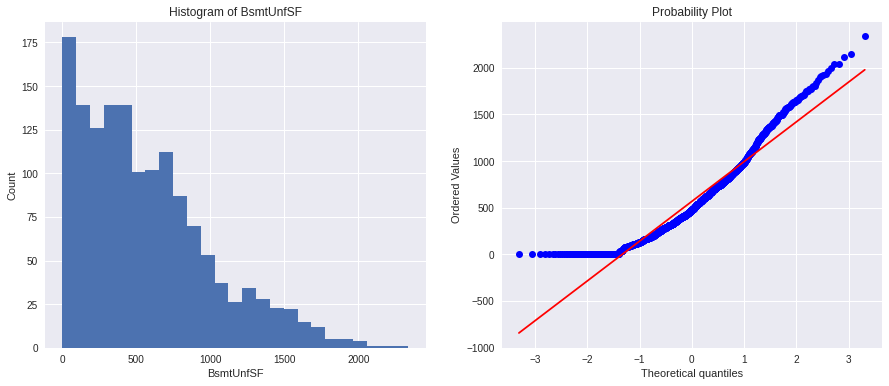

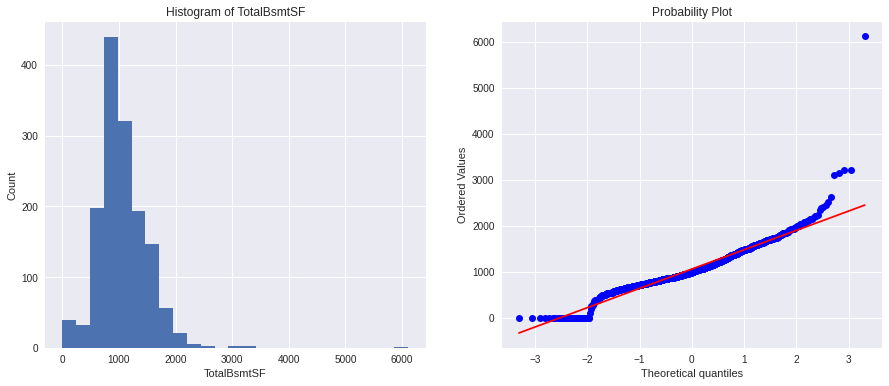

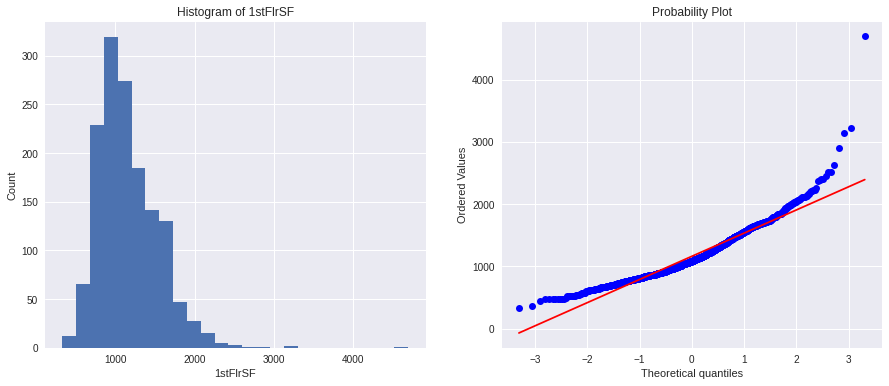

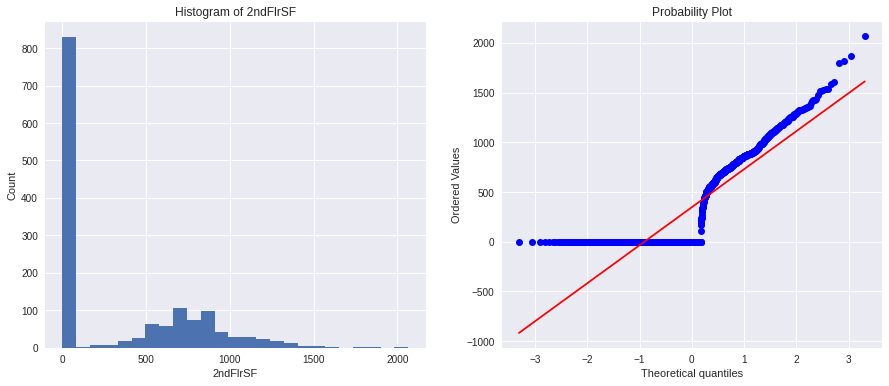

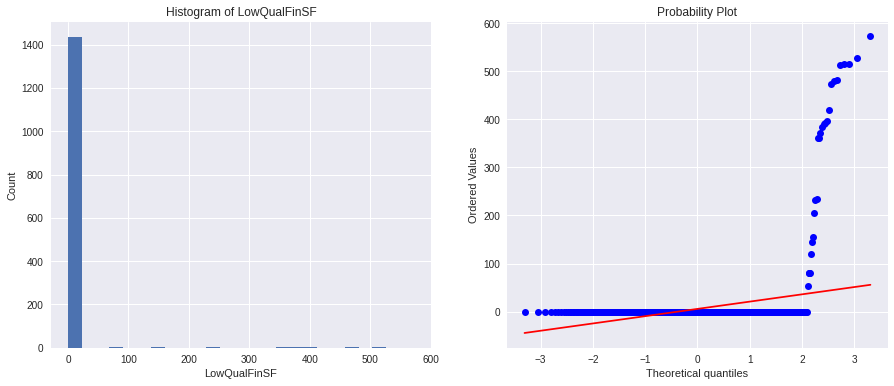

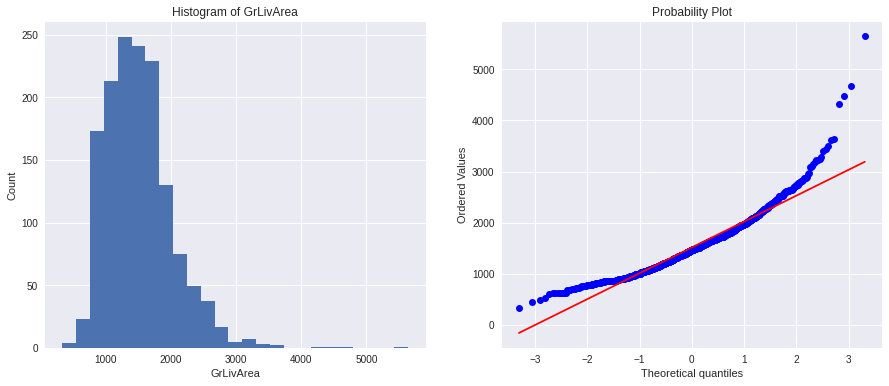

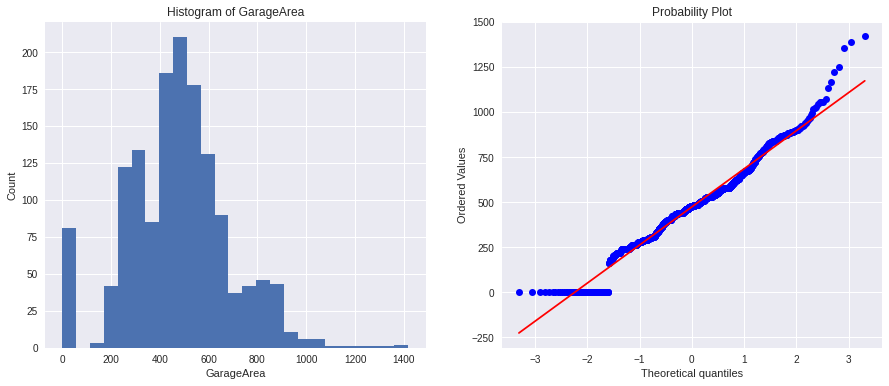

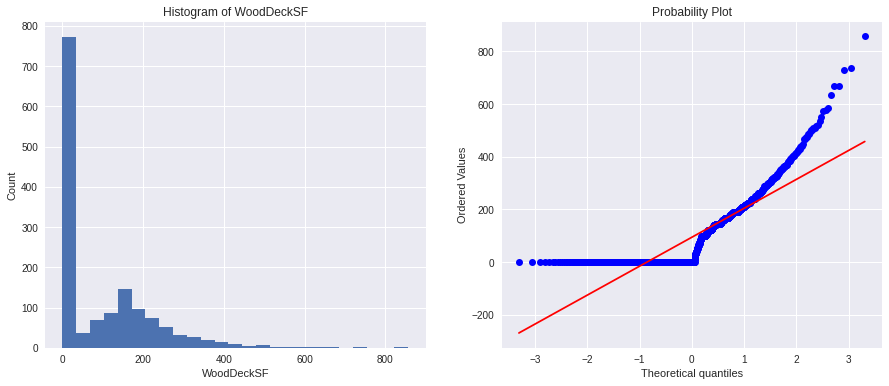

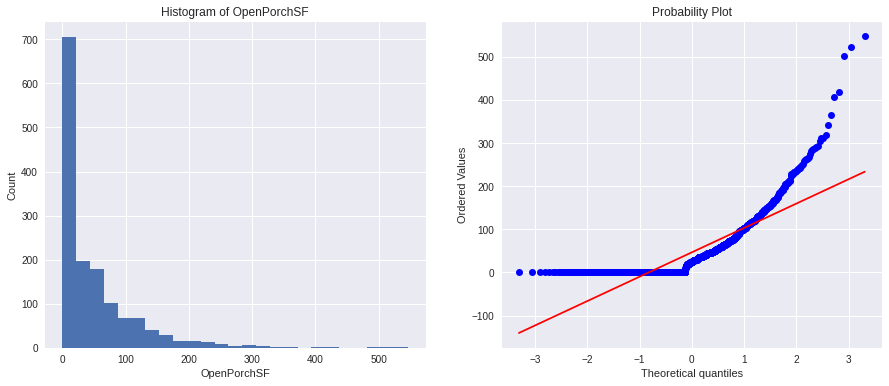

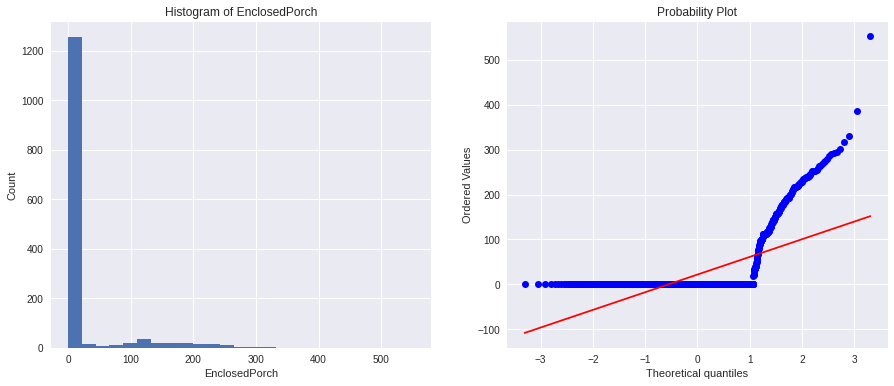

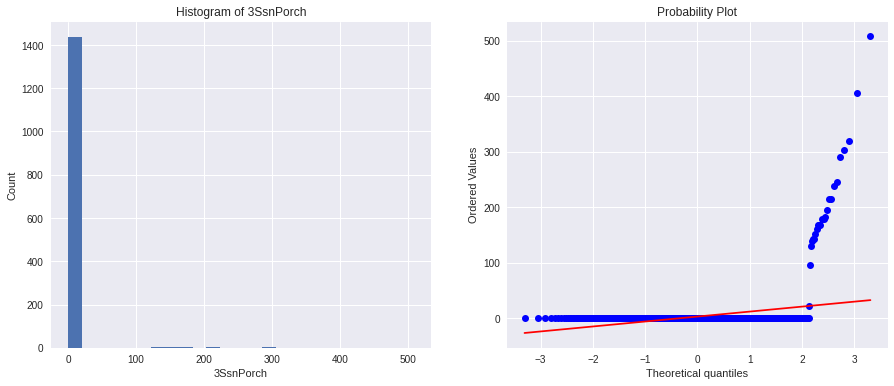

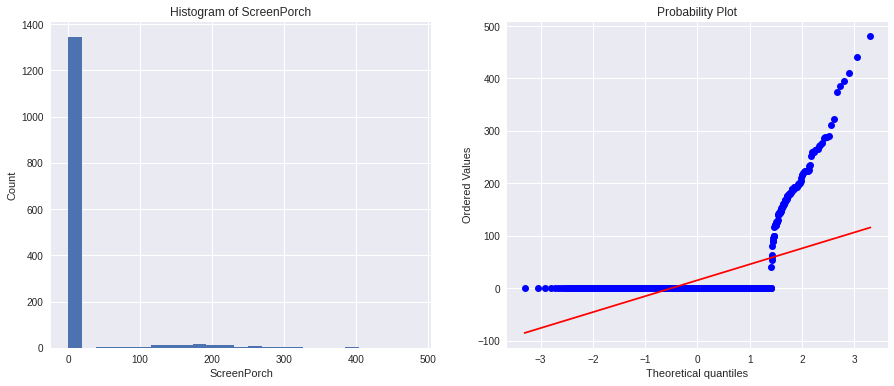

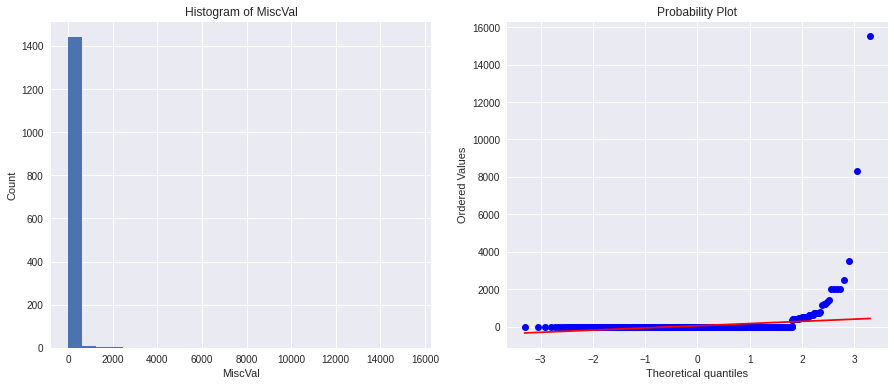

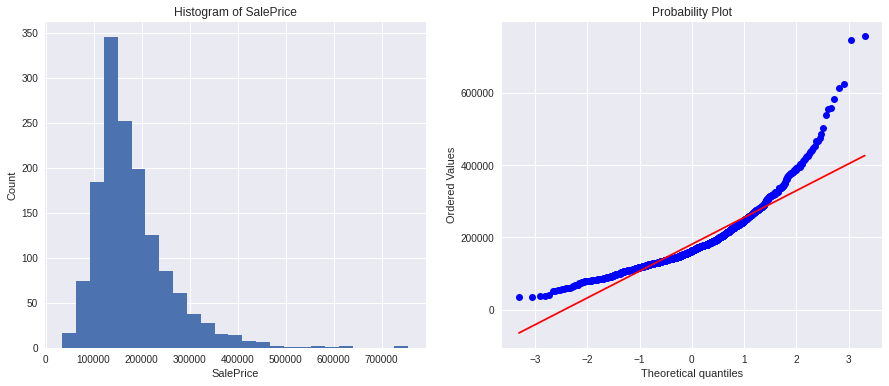

In [19]:
for feature in continuous_features:
  data = dataset.copy()
  diagnostic_plots(data, feature)

#### **Observations:**
1. All the plots do not have a normal distribution. Some are very far from a normal distribution. Let's try to fix this using the logarithmic transformation.

### **Logarithmic Transformation of the Continuous Features**

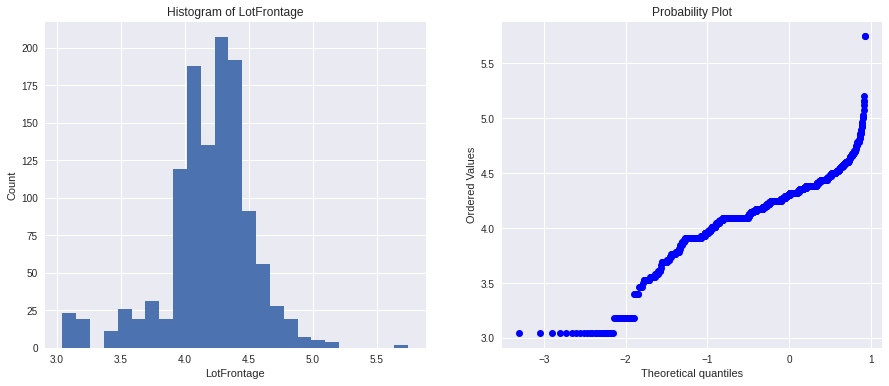

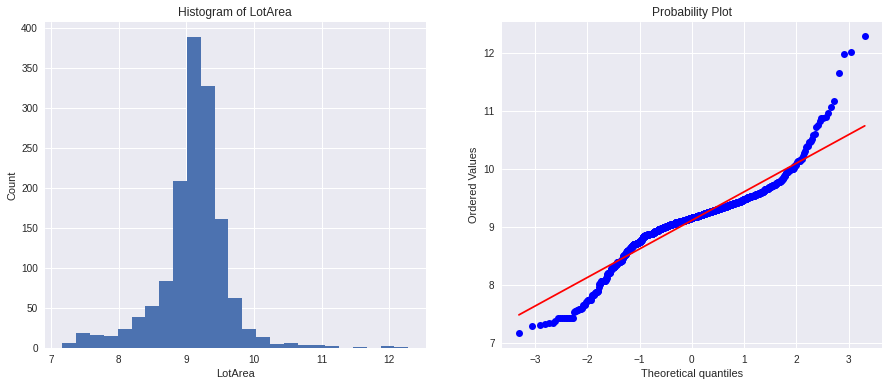

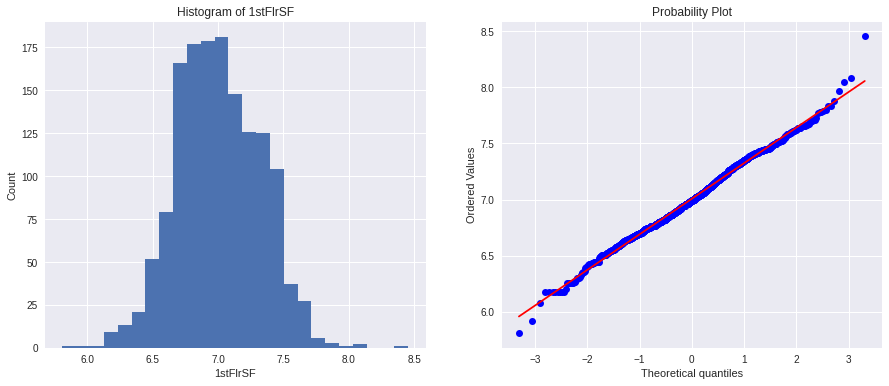

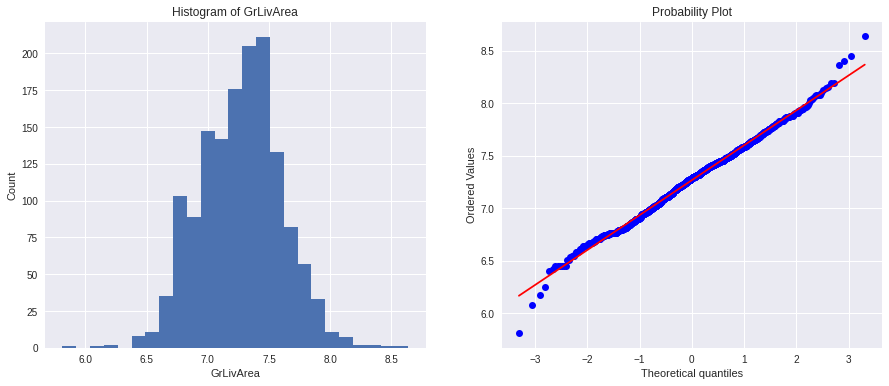

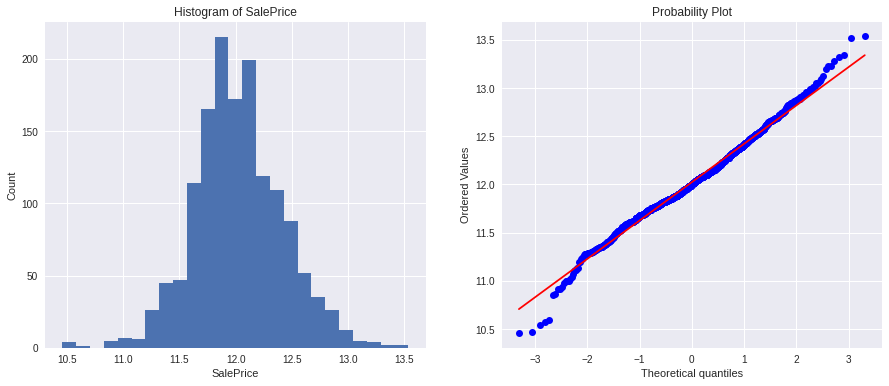

In [20]:
for feature in continuous_features:
  data = dataset.copy()
  if 0 in data[feature].unique():
    pass # we do this since logarithm is not defined for 0
  else:
    data[feature] = np.log(data[feature])
    diagnostic_plots(data, feature)

#### **Observations:**
1. We have been successful in transforming the last three features into a normal distribution, but this is not sufficient. It seems like linear models won't give us a good score as many of the features are not normally distributed. Hence, we may want to check with other models which don't assume normally distributed features.

### **Outliers**
To visualize outliers, we will use boxplots.

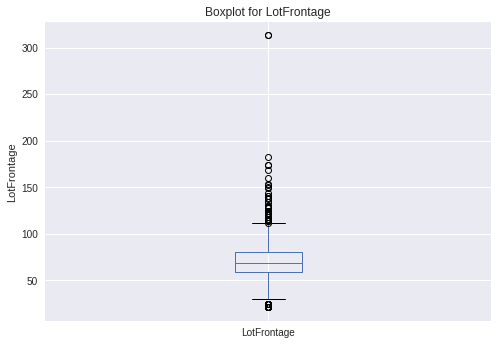

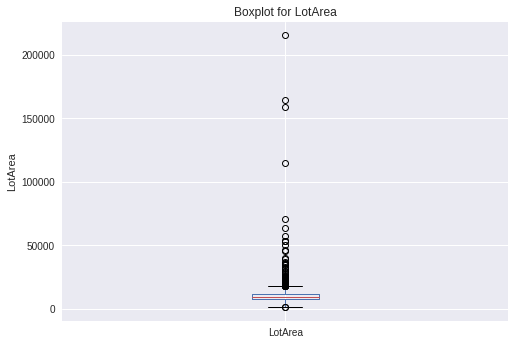

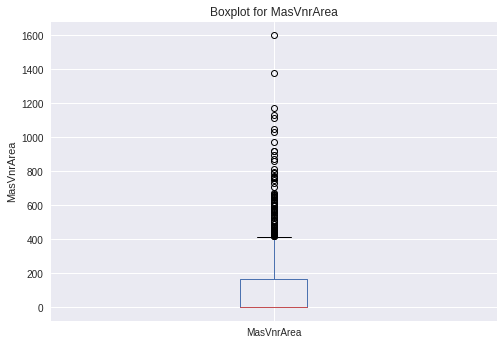

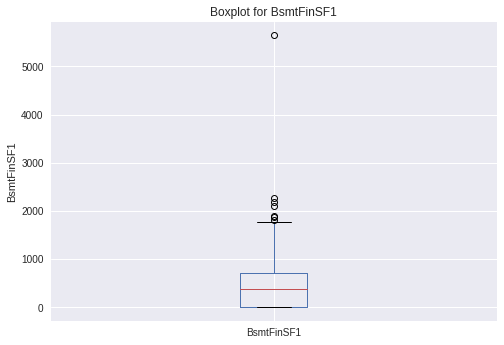

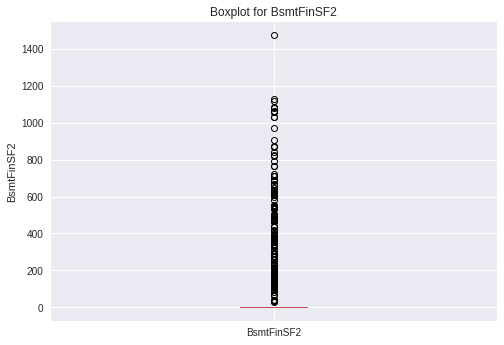

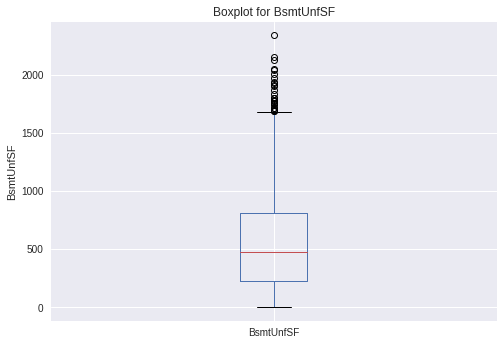

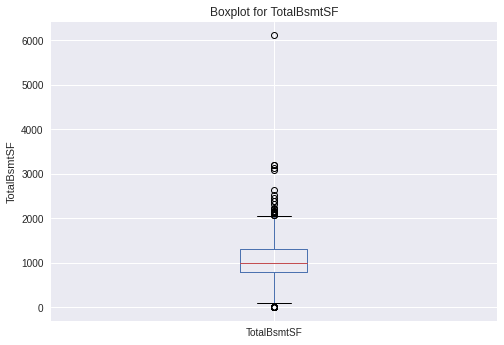

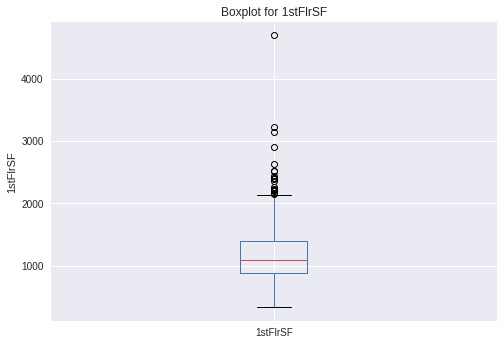

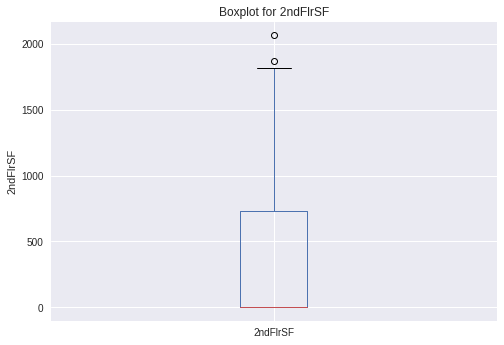

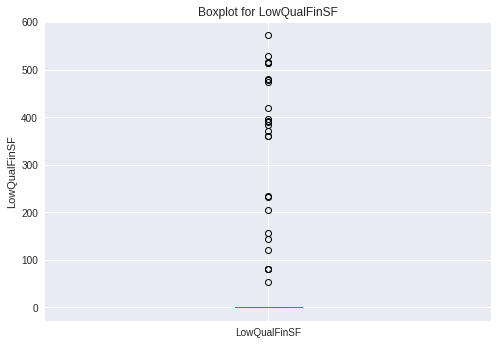

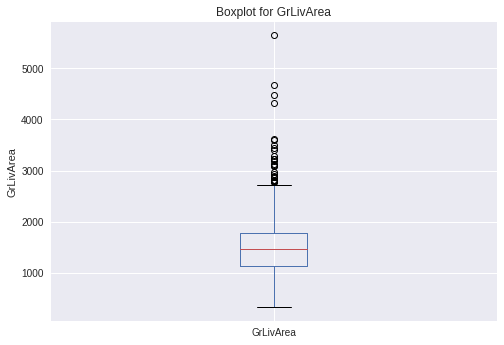

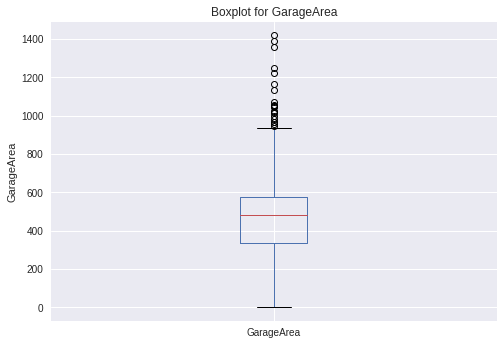

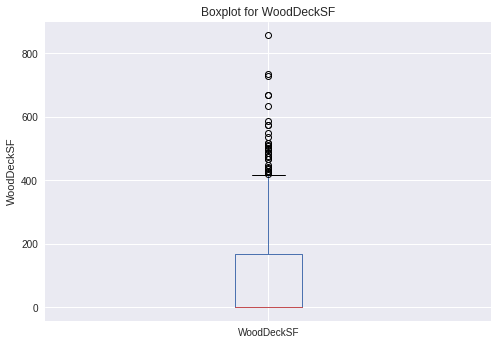

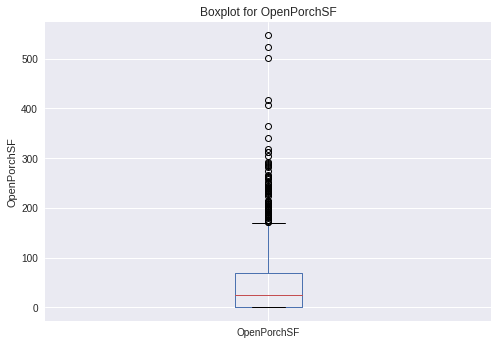

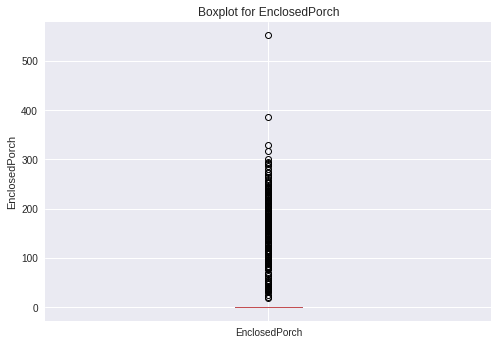

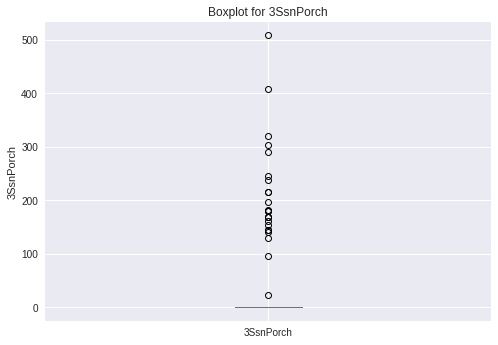

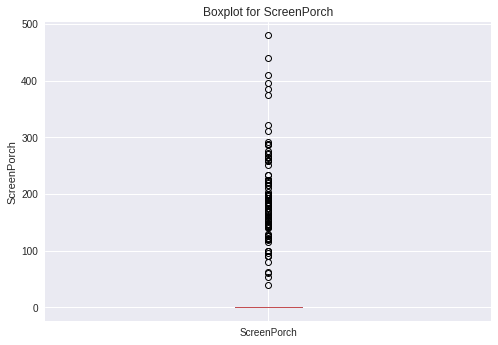

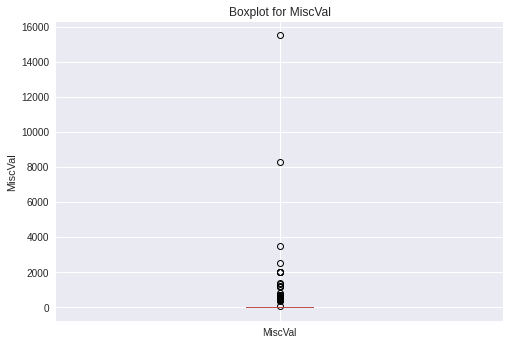

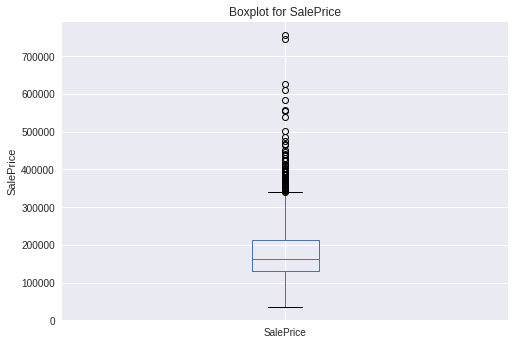

In [21]:
for feature in continuous_features:
  data = dataset.copy()
  plt.style.use('seaborn')
  data.boxplot(column=feature)
  plt.ylabel(feature)
  plt.title(f'Boxplot for {feature}')
  plt.show()

#### **Observations:**
1. We can see that there are a lot of outliers in our data. If we want to use a model which is sensitive to outliers, we will have to handle these outliers properly, maybe using transformations, discretization, etc.

## **Categorical Features**

In [22]:
categorical_features = [feature for feature in dataset.columns if data[feature].dtype == 'O']

print(f'There are total {len(categorical_features)} categorical features in our data, which are:')
categorical_features

There are total 43 categorical features in our data, which are:


['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [23]:
dataset[categorical_features].head(10)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
5,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,Wood,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,MnPrv,Shed,WD,Normal
6,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Ex,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
7,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,Gable,CompShg,HdBoard,HdBoard,Stone,TA,TA,CBlock,Gd,TA,Mn,ALQ,BLQ,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,Shed,WD,Normal
8,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,Gable,CompShg,BrkFace,Wd Shng,None,TA,TA,BrkTil,TA,TA,No,Unf,Unf,GasA,Gd,Y,FuseF,TA,Min1,TA,Detchd,Unf,Fa,TA,Y,NaN,NaN,NaN,WD,Abnorml
9,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,BrkTil,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,Gd,TA,Y,NaN,NaN,NaN,WD,Normal


### **Cardinality of Categorical Features**

In [24]:
for feature in categorical_features:
  print(f'Cardinality of {feature}: {dataset[feature].nunique()}')

Cardinality of MSZoning: 5
Cardinality of Street: 2
Cardinality of Alley: 2
Cardinality of LotShape: 4
Cardinality of LandContour: 4
Cardinality of Utilities: 2
Cardinality of LotConfig: 5
Cardinality of LandSlope: 3
Cardinality of Neighborhood: 25
Cardinality of Condition1: 9
Cardinality of Condition2: 8
Cardinality of BldgType: 5
Cardinality of HouseStyle: 8
Cardinality of RoofStyle: 6
Cardinality of RoofMatl: 8
Cardinality of Exterior1st: 15
Cardinality of Exterior2nd: 16
Cardinality of MasVnrType: 4
Cardinality of ExterQual: 4
Cardinality of ExterCond: 5
Cardinality of Foundation: 6
Cardinality of BsmtQual: 4
Cardinality of BsmtCond: 4
Cardinality of BsmtExposure: 4
Cardinality of BsmtFinType1: 6
Cardinality of BsmtFinType2: 6
Cardinality of Heating: 6
Cardinality of HeatingQC: 5
Cardinality of CentralAir: 2
Cardinality of Electrical: 5
Cardinality of KitchenQual: 4
Cardinality of Functional: 7
Cardinality of FireplaceQu: 5
Cardinality of GarageType: 6
Cardinality of GarageFinish: 

#### **Observations:**
1. Some features have large cardinality values. For such features, we cannot use one-hot encoding as it will expand our feature space a lot. Maybe ordinal encoding would be a better encoding method in their case.

### **Relationship between Categorical features and `SalePrice`**

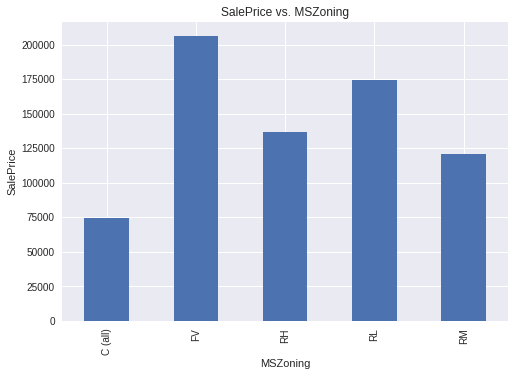

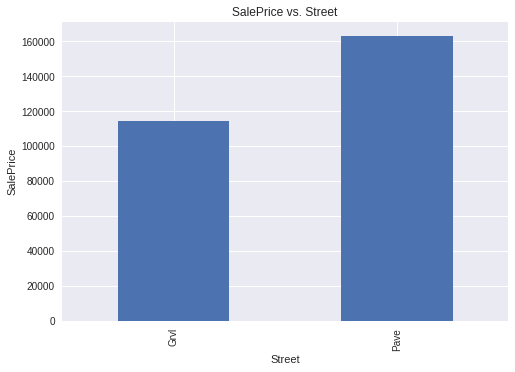

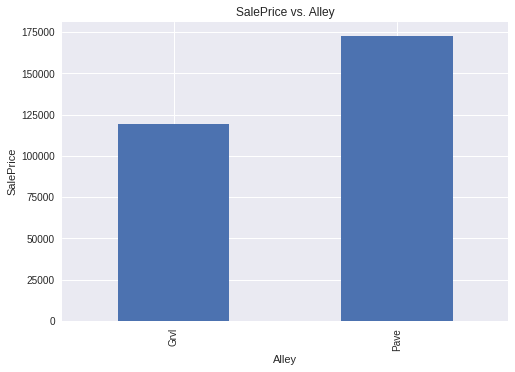

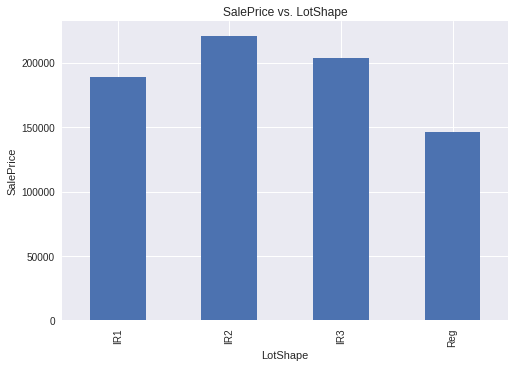

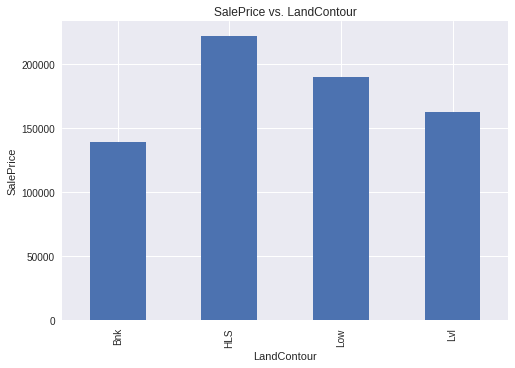

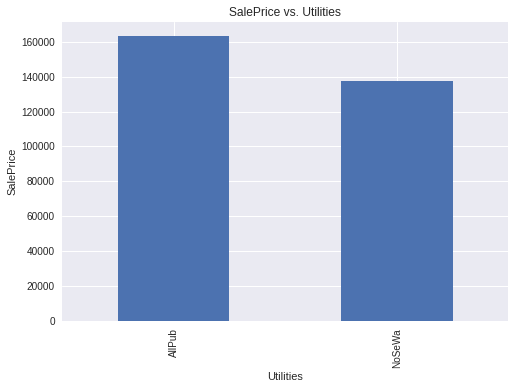

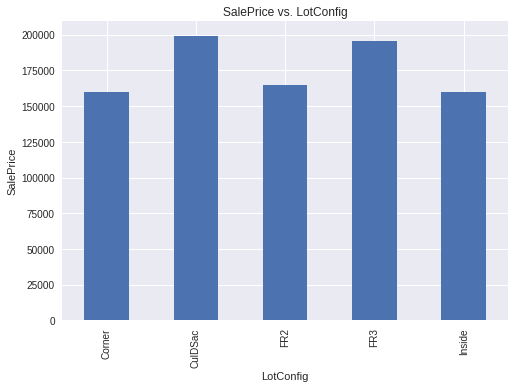

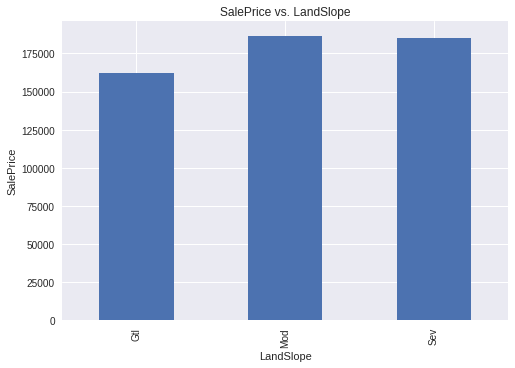

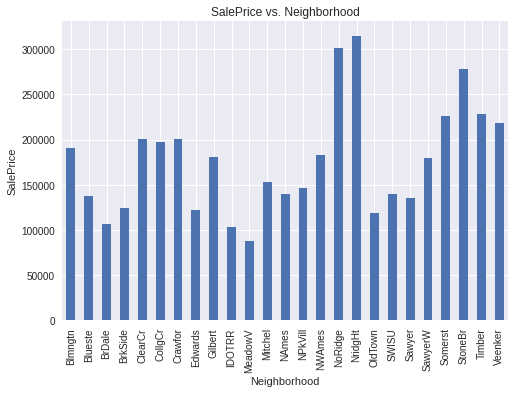

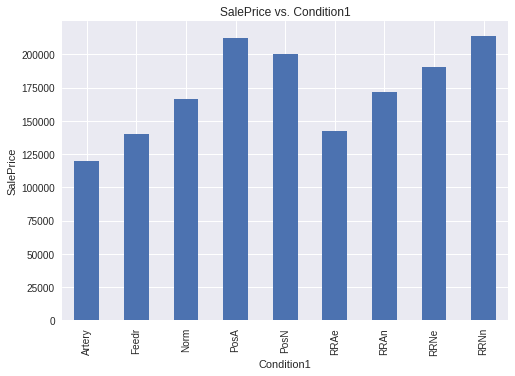

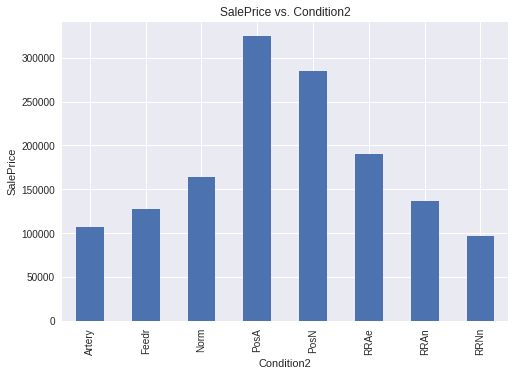

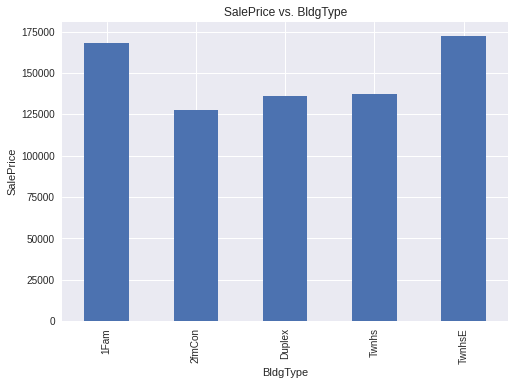

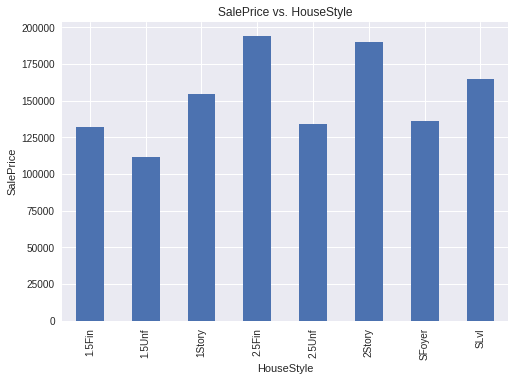

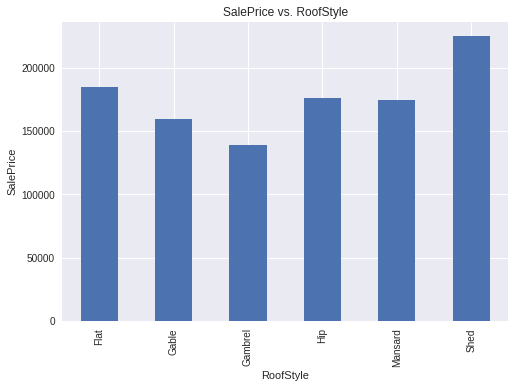

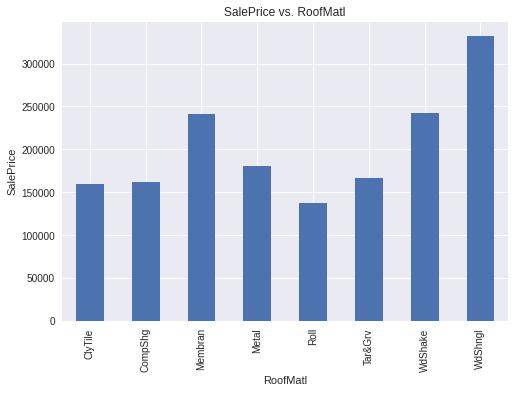

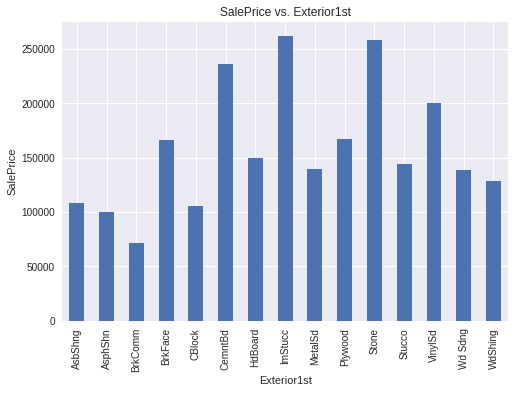

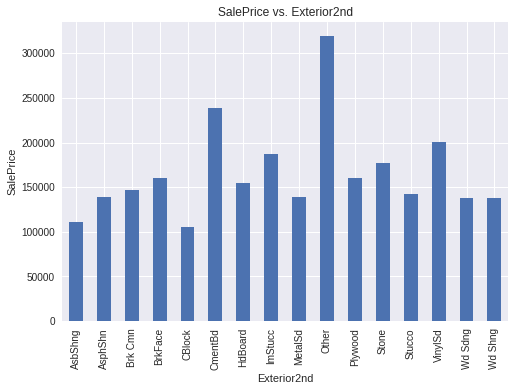

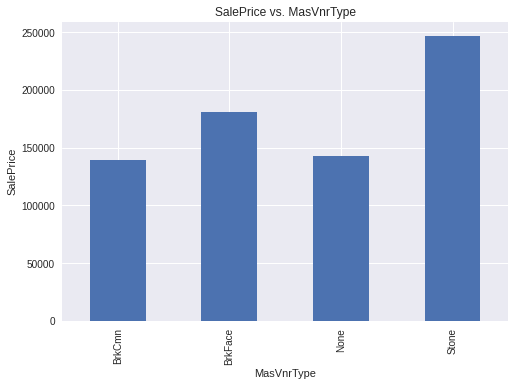

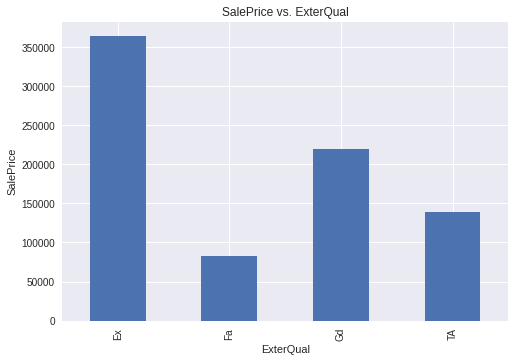

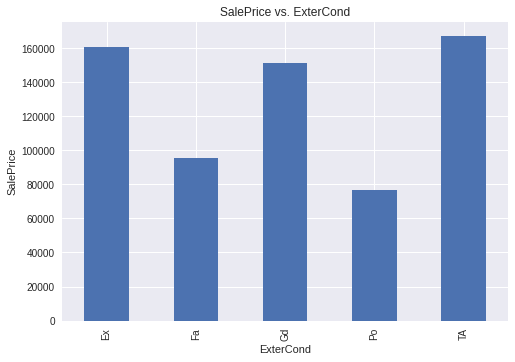

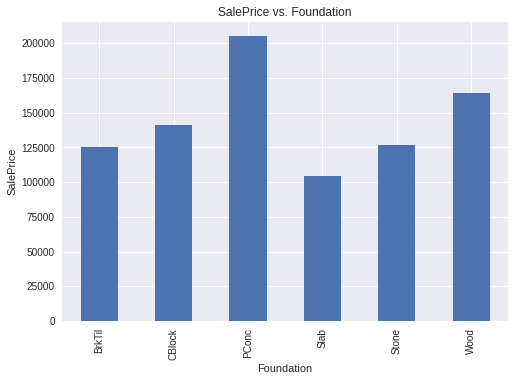

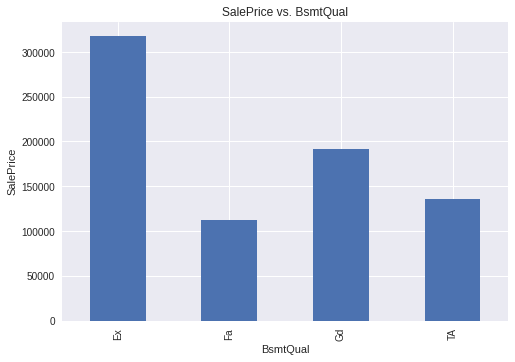

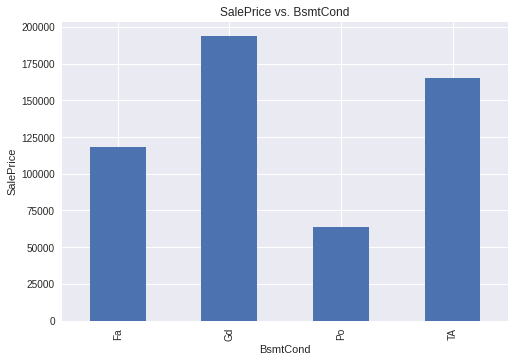

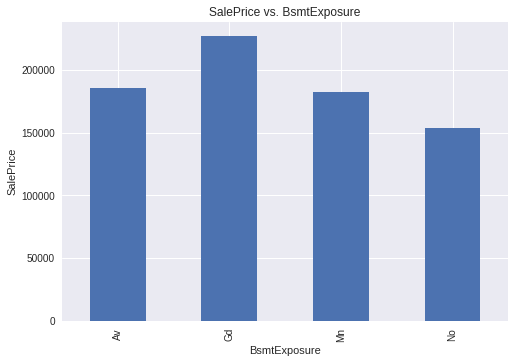

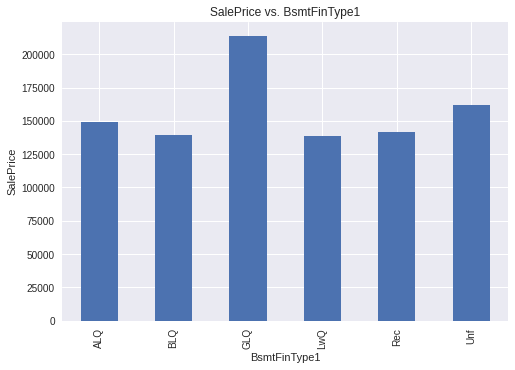

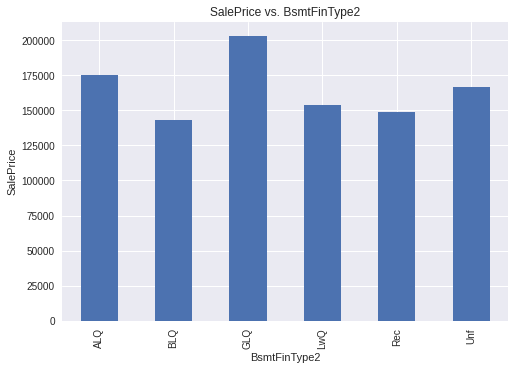

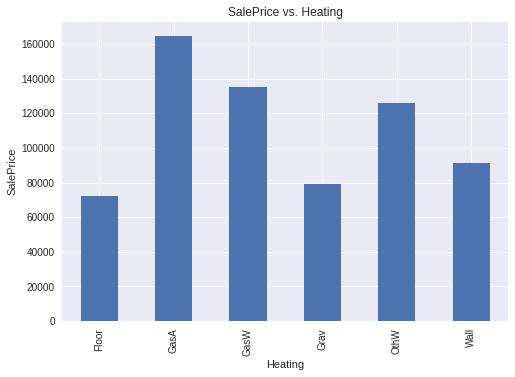

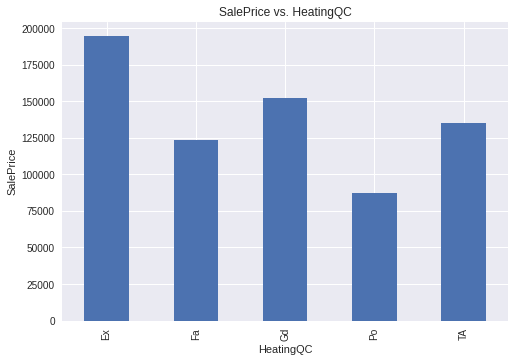

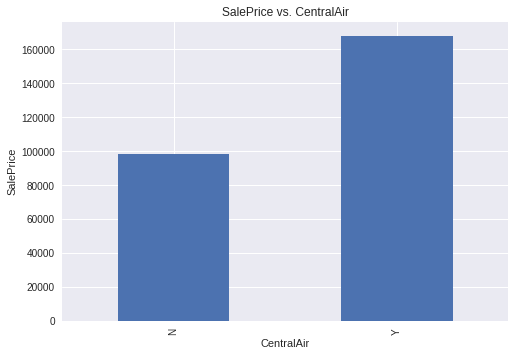

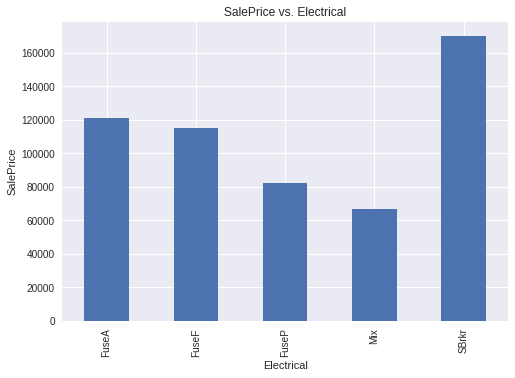

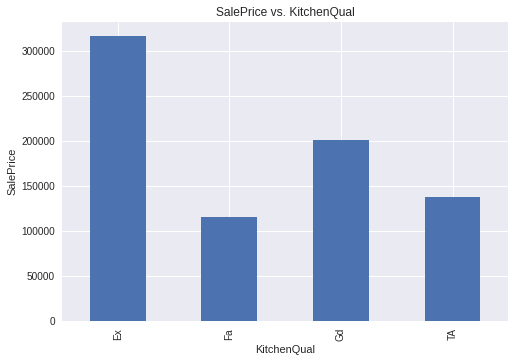

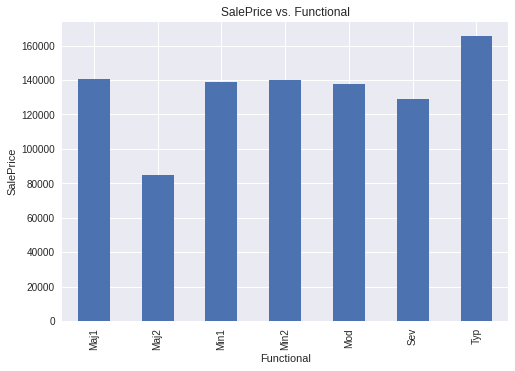

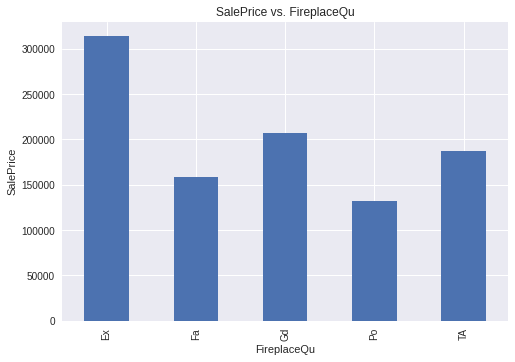

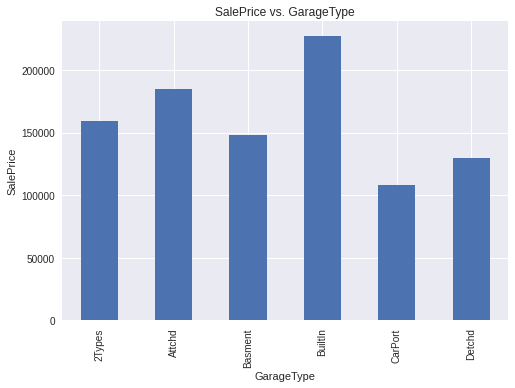

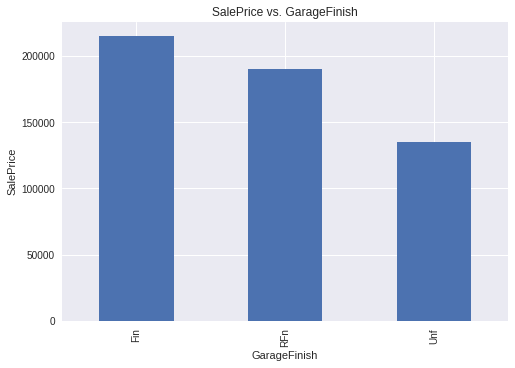

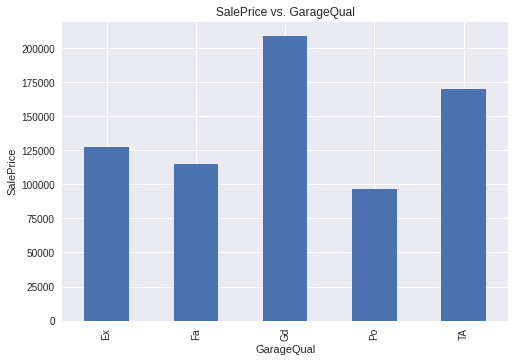

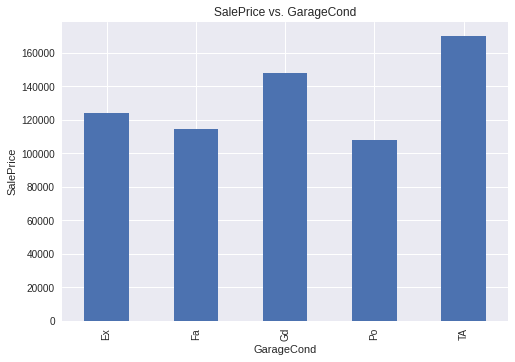

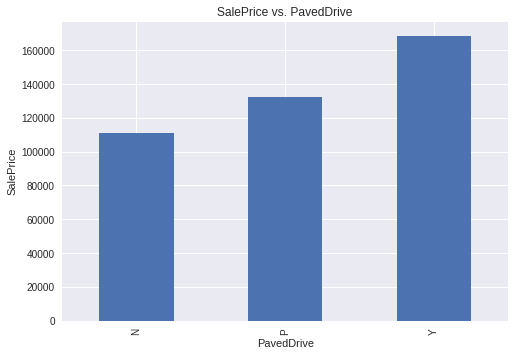

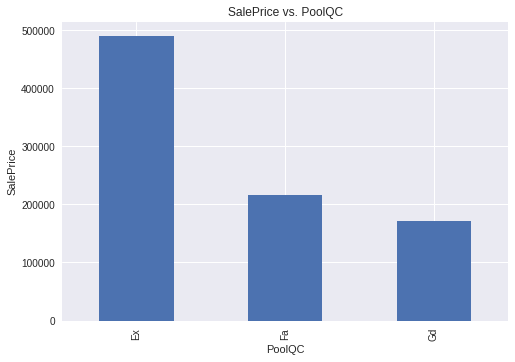

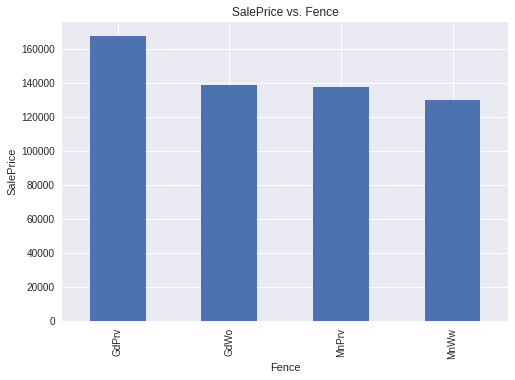

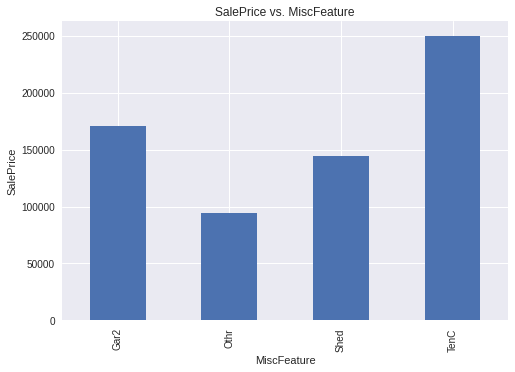

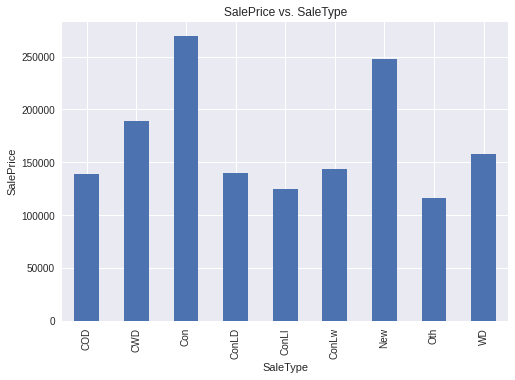

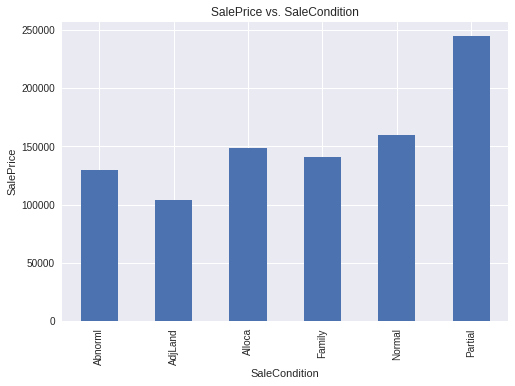

In [25]:
for feature in categorical_features:
  data = dataset.copy()
  plt.style.use('seaborn')
  data.groupby(feature)['SalePrice'].median().plot.bar()
  plt.xlabel(feature)
  plt.ylabel('SalePrice')
  plt.title(f'SalePrice vs. {feature}')
  plt.show()

#### **Observations:**
1. We would have to encode these features in such a way that there is a monotonic relationship between and `SalePrice`, for models assuming a monotonous relationship between them and `SalePrice`.